# 「プチ」20230603<br>クラスやMatplotlibの諸々について

### クラスの意義

* データのカプセル化: クラスはデータとそれに関連する操作（メソッド）をまとめるための構造。
    関数をクラスに含めることで、データと操作が一体化し、関連するコードが組織化され、コードの保守性や再利用性が向上する。

* 状態の保持: クラスはインスタンスとして作成され、インスタンスは状態（インスタンス変数）を保持できる。
    関数だけでは一時的な処理しかできないが、クラスにすることで状態を持つことができる。状態を保持したまま複数のメソッドを呼び出すことができる。

* オブジェクト指向プログラミングの原則に従う: クラスはオブジェクト指向プログラミング（OOP）の基本概念。
    OOPは、データと操作を結びつけることでコードの構造をより理解しやすくし、柔軟性と拡張性を向上させる。

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib
%matplotlib inline
from graph_func import Customized_bar_graph  # ここで別ファイル化したクラスを呼び出す
mpl.style.use('dark_background')

In [138]:
help(Customized_bar_graph)   # クラスも関数に似た構造なのでdocstringをhelpで参照できる

Help on class Customized_bar_graph in module graph_func:

class Customized_bar_graph(builtins.object)
 |  Customized_bar_graph(idx, col, data)
 |  
 |  描画データをDataFrameのindexとcolumnsのインデックス参照で指定することで
 |  積上げ棒グラフ、集合棒グラフを描画する
 |   args
 |       idx: index
 |       col: columns
 |       data: DataFrame
 |       ax: axes (class methods)
 |   methods
 |       stacked_bar(self, ax): 積上げ棒グラフ（縦）
 |       stacked_barh(self, ax): 積上げ棒グラフ（横）
 |       clustered_bar(self, ax): 集合棒グラフ（縦）
 |       clustered_barh(self, ax): 集合棒グラフ（横）
 |   usage
 |       fig, (ax1, ax2) = plt.subplots(1, 2)
 |       df = pd.DataFrame(data, args)
 |       idx = df.index[3: 15]
 |       col = df.columns[[3, 4, 5]]
 |       c_bar = Customized_bar_graph(idx=idx, col=col, data=df)
 |       c_bar.stacked_bar(ax=ax1)
 |       c_bar.clustered_bar(ax=ax2)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, idx, col, data)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  clustered_bar(self, ax)
 

In [139]:
# ペアプロの課題のSSDSE-E-2023.xlsx（統計センターの教育用データセット）を読み込み
# 都道府県をインデックスに、項目名をカラムに設定、コードは便宜上削除

df = pd.read_excel('SSDSE-E-2023.xlsx', skiprows=2, index_col=1)
df.drop('地域コード', axis=1, inplace=True)

In [131]:
print(df.index)
print(df.columns)

Index(['全国', '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '山梨県',
       '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県',
       '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県',
       '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'],
      dtype='object', name='都道府県')
Index(['総人口', '日本人人口', '15歳未満人口', '15～64歳人口', '65歳以上人口', '外国人人口', '出生数',
       '合計特殊出生率', '死亡数', '転入者数（日本人移動者）', '転出者数（日本人移動者）', '一般世帯数', '一般世帯人員数',
       '単独世帯数', '婚姻件数', '離婚件数', '総面積（北方地域及び竹島を除く）', '可住地面積', '自然公園面積',
       '県内総生産額（平成23年基準）', '県民所得（平成23年基準）', '1人当たり県民所得（平成23年基準）', '事業所数（民営）',
       '事業所数（民営）（建設業）', '事業所数（民営）（製造業）', '事業所数（民営）（情報通信業）',
       '事業所数（民営）（卸売業，小売業）', '事業所数（民営）（宿泊業，飲食サービス業）', '事業所数（民営）（生活関連サービス業，娯楽業）',
       '事業所数（民営）（医療，福祉）', '従業者数（民営）', '従業者数（民営）（建設業）', '従業者数（民営）（製造業）',
       '従業者数（民営）（情報通信業）', '従業者数（民営）（卸売業，小売業）', '従業者数（民営）（宿泊業，飲食サービス業）',
       '従

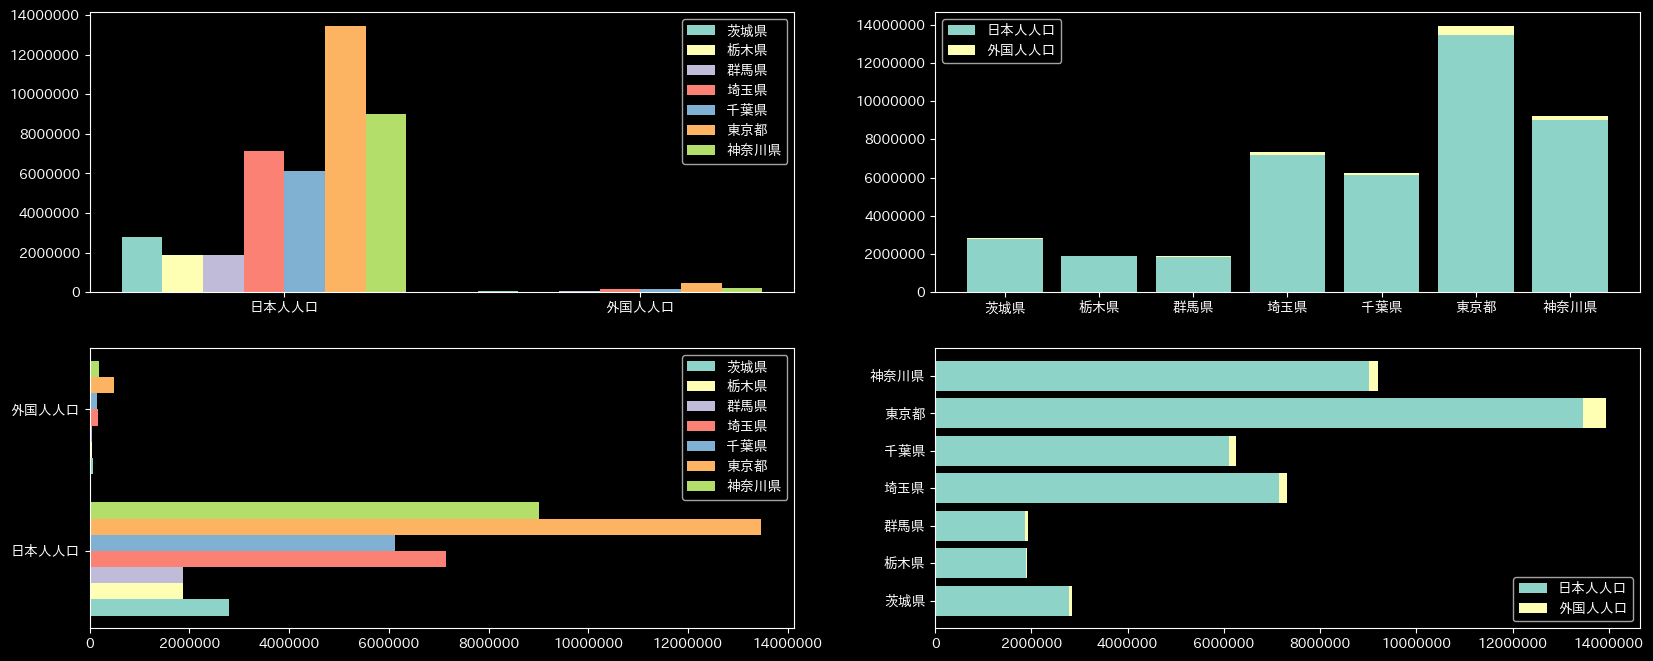

In [132]:
# オブジェクト指向記法でfigureと4つのAxesを生成
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))

# インポート済のクラス（Customized_bar_graph）に引数設定してインスタンス化
data = df
idx = df.index[8:15]
col = df.columns[[1,5]]
cg = Customized_bar_graph(idx=idx, col=col, data=data)

# 4つのクラスメソッドを呼び出しグラフを描画
cg.clustered_bar(ax=ax1)     # ax1: 集合棒グラフ（縦）
cg.stacked_bar(ax=ax2)       # ax2: 積上げ棒グラフ（縦）
cg.clustered_barh(ax=ax3)    # ax3: 集合棒グラフ（横）
cg.stacked_barh(ax=ax4)      # ax4: 積上げ棒グラフ（横）

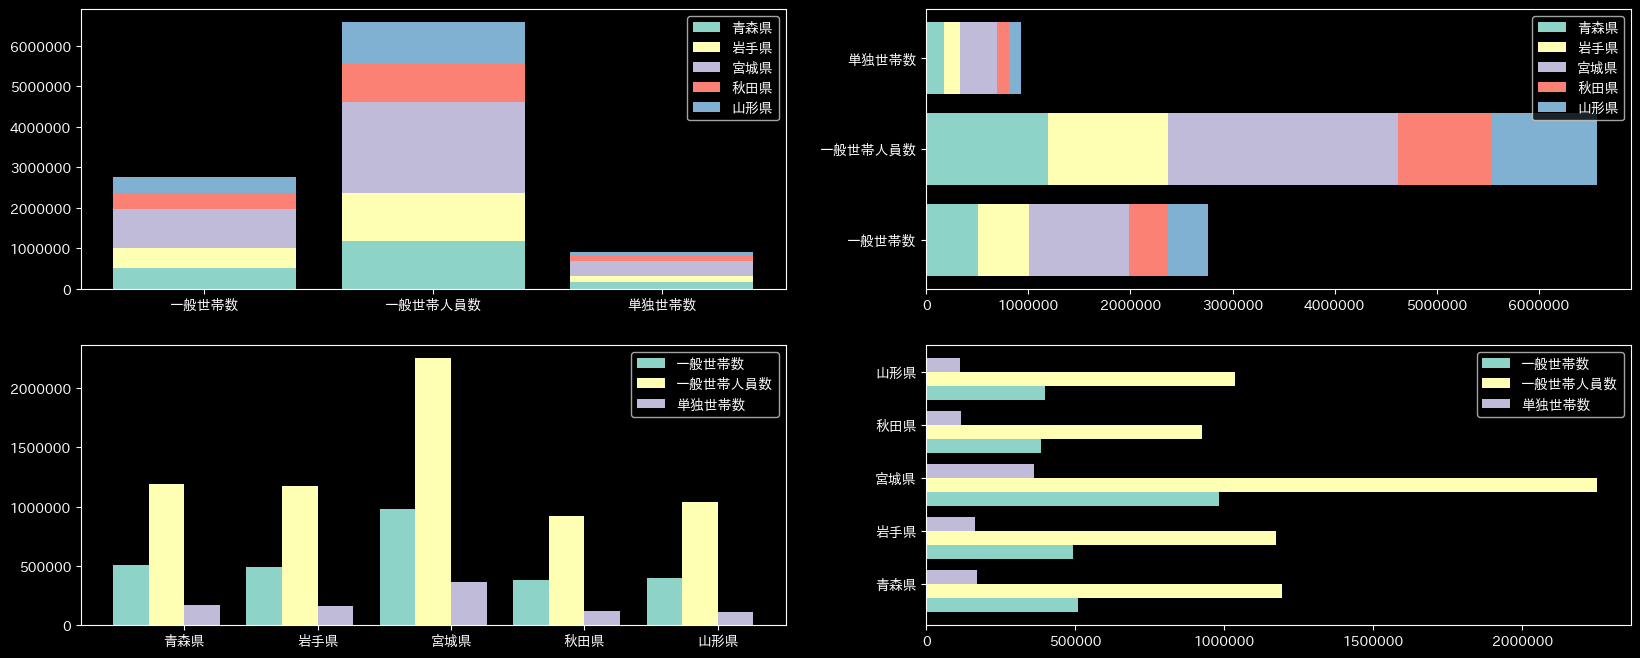

In [133]:
# pandasは基本的に列単位なので、集合棒グラフや積上げ棒グラフも列単位で作成される
# 行単位に作成したい場合は以下のようにデータフレームの側で軸転換する必要がある

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))

data = df.T                     # 軸転換
idx = data.index[11:14]
col = data.columns[2:7]
cg = Customized_bar_graph(idx=idx, col=col, data=data)

cg.stacked_bar(ax=ax1)          # ax1: 積上げ棒グラフ（縦）
cg.stacked_barh(ax=ax2)         # ax2: 積上げ棒グラフ（横）
cg.clustered_bar(ax=ax3)        # ax3: 集合棒グラフ（縦）
cg.clustered_barh(ax=ax4)       # ax4: 集合棒グラフ（横）


## Matplotlibの軸設定（axisとその下のtick）について、ここが分かりにくいところなのでもう少し弄ってみた

In [134]:
print('\nax1積上げ棒グラフ（縦）のaxis設定')
print(ax1.xaxis.get_major_locator())
print(ax1.yaxis.get_major_locator())
print(ax1.xaxis.get_major_formatter())
print(ax1.yaxis.get_major_formatter())

print('\nax2積上げ棒グラフ（横）のaxis設定')
print(ax2.xaxis.get_major_locator())
print(ax2.yaxis.get_major_locator())
print(ax2.xaxis.get_major_formatter())
print(ax2.yaxis.get_major_formatter())

print('\nax3集合棒グラフ（縦）のaxis設定')
print(ax3.xaxis.get_major_locator())
print(ax3.yaxis.get_major_locator())
print(ax3.xaxis.get_major_formatter())
print(ax3.yaxis.get_major_formatter())

print('\nax4集合棒グラフ（横）のaxis設定')
print(ax4.xaxis.get_major_locator())
print(ax4.yaxis.get_major_locator())
print(ax4.xaxis.get_major_formatter())
print(ax4.yaxis.get_major_formatter())



ax1積上げ棒グラフ（縦）のaxis設定

ax2積上げ棒グラフ（横）のaxis設定

ax3集合棒グラフ（縦）のaxis設定

ax4集合棒グラフ（横）のaxis設定


* AutoLocatorやScalarFormatterはデフォルト設定
* 積上げ棒グラフのカテゴリ名は、self.indexから文字列を引用しており、LocatorもFormatterもStrCategoryになっている
* 集合棒グラフの県名表記部分は、set_xticksで位置を固定的に指定しているからFixedLocatorになっている
* 同じく集合棒グラフの県名表記部分は、set_xticklabelsの指定によりFuncFormatterとなっている
* 集合棒グラフのheightやleftの値の設定方法は積み上げ棒グラフと同じはずだがこちらはFuncFormatterになっている,
FixedLocatorとの関係かもしれない

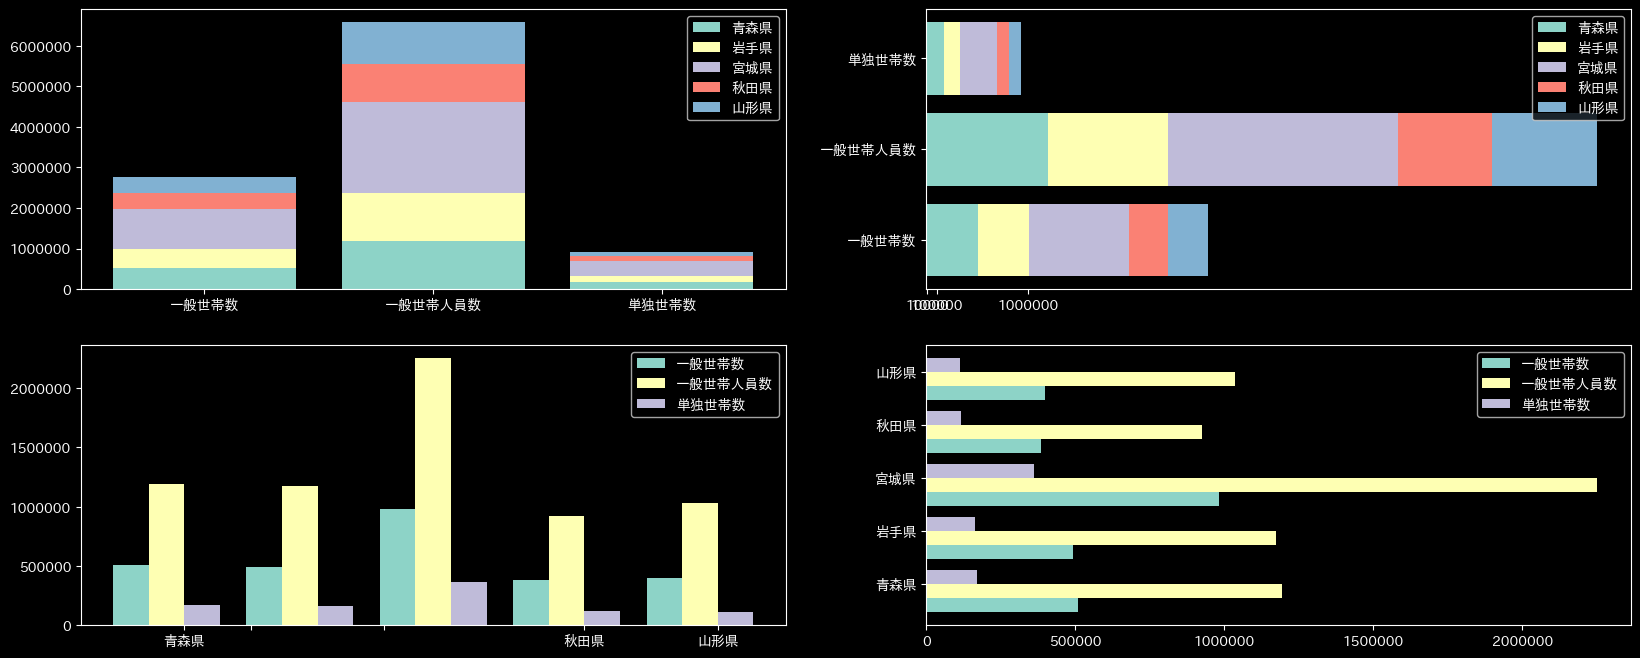

In [135]:
from matplotlib import ticker
ax2.xaxis.set_major_locator(ticker.LogLocator()) # ax2のlocatorをlogに変更
ax3.set_xticks([0, 0.5, 1.5, 3, 4])              # ax3のlocatorの値を変更
ax2.figure

* ax2: AutoLocatorをLobLocatorに変更したからといってグラフの値が連動するわけではない
* ax3: FixedLocatorの値を変更したら値に対応するFuncFormatterのラベルだけが表示されるようになった

* ちなみに、MatplotlibのArtist（matplotlibオブジェクトの総称）は、containerとprimitiveに分類されていて、containerはその名の通り入れ物、primitiveは諸々の部品
* containerの階層は、figure⇒axes⇒axis⇒tickと４層になっているのは知っていたが、属性参照が上下双方可能なのは今回初めて理解した

Figure(2000x800)
Axes(0.125,0.53;0.352273x0.35)
XAxis(250.0,424.0)
[<Axes: >, <Axes: >, <Axes: >, <Axes: >]


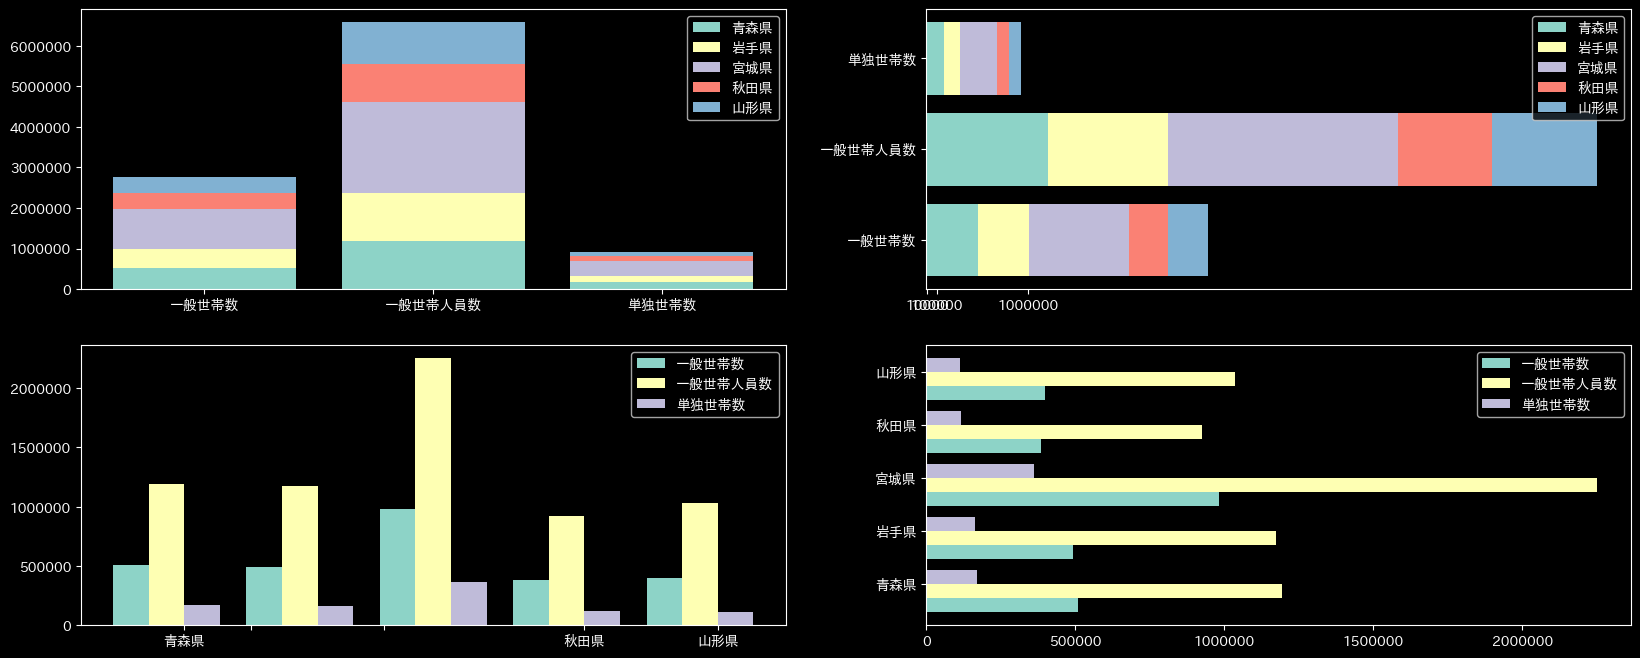

In [140]:
print(ax1.figure)                 # 上位
print(ax1.axes)                   # 同位
print(ax1.xaxis)                  # 下位
print(ax1.xaxis.axes.figure.axes) # 下位⇒同位⇒上位⇒下位（上からは4つ見える）
ax1.xaxis.axes.figure             # 属性参照でグラフ描画も出来る

## 案外、大事だと気付いたこと
* ↑でもさらっと使用しているが、figure属性でグラフを再表示するというのは意味のあることだと思う
* つまり、matplotlibの問題は、取り敢えずグラフ描画してそこから設定を加えていくという形式が多いが、既存のグラフの属性を変えるのではなく改めて書き直す解答になっている場合がほとんど
* 本来は既存のグラフの指定の属性だけ変えるべきで、その結果を表示するのにfigure属性での表示が必要ということ
* そういうやり方で問題を解き直すと属性への理解がぐっと深まるのが分かる

* なお、tickの設定に関しては、tick_paramsが良いと先週コメントしたが、rcParmsで全体を指定することもできる
* せっかくクラスも覚えたので@mp.rc_contextというデコレーターを使ってrcの設定もやってみた ⇒ graph_fanc.py